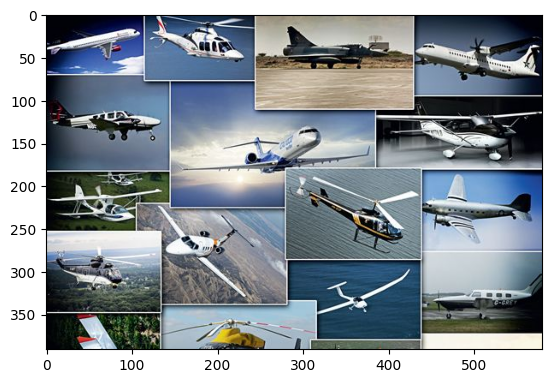

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('aviao4.jpg'))

## Faz análise dos dados de fatores contribuintes e recomendações de segurança em acidentes aeronáuticos

Este projeto tem como objetivo fazer uma análise ampla dos dados de acidentes aeronáuticos limpos e tratados no projeto Cenipa_limpa_trata_armazena, oferecendo uma visão ampla com a descrição e diagnóstico dos dados.

In [37]:
# importa bibliotecas
import pandas as pd
from pandasql import sqldf
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [38]:
# le os acidentes tratados para análise
df_acidentes = pd.read_csv('arquivos_tratados/df_acidentes_aeronauticos.csv')

In [39]:
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,01/01/2007,00:00:00,NaN,1,NÃO,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INCIDENTE,LONDRINA,PR,BRASIL,***,01/01/2007,21:10:00,NaN,1,NÃO,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACIDENTE,MOGI DAS CRUZES,SP,BRASIL,***,01/01/2009,15:35:00,FINALIZADA,1,NÃO,PTLDO,AVIÃO,NORTH AMERICAN,AT-6D,T6,PISTÃO,MONOMOTOR,2404,2404,2.0,1942.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,CAMPO DE MARTE - SP,SANTOS DUMONT,ESPECIALIZADA,ESPECIALIZADA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,Dar ampla divulgação aos operadores de aeronav...,***,ABAAC,ASSOCIAÇÃO BRASILEIRA DE AERONAVES ANTIGAS E C...


In [40]:
# verifica nome das colunas
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9817 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  aeronave_matricula               9819 non-null   object 
 11  aeronave_tipo_veiculo            9819 non-null   object 
 12  aeronave_fabricante 

In [82]:
# verifica se existe algum tipo duplicado e qual tipo ocorre mais
display(df_acidentes.ocorrencia_tipo.value_counts().head(50))

ocorrencia_tipo
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    1197
COLISÃO COM AVE                                       1180
FALHA DO MOTOR EM VOO                                 1107
ESTOURO DE PNEU                                        887
PERDA DE CONTROLE NO SOLO                              673
PERDA DE CONTROLE EM VOO                               538
COM TREM DE POUSO                                      514
OUTROS                                                 422
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO      253
EXCURSÃO DE PISTA                                      194
INDETERMINADO                                          188
POUSO EM LOCAL NÃO PREVISTO                            168
TRÁFEGO AÉREO                                          157
POUSO BRUSCO                                           154
COLISÃO COM OBSTÁCULOS NO SOLO                         153
PANE SECA                                              134
POUSO SEM TREM                          

In [140]:
# conta a quantidade de ocorrências e agrupa pela classe
# não houve ocorrência de nulos para essa classificação, verificados em df_acidentes.info()    
df_tipo_ocorr = sqldf('select ocorrencia_aerodromo as aerodromo, ' \
                           'ocorrencia_tipo as tipo_ocorr, ' \
                           'count(ocorrencia_aerodromo) as qtde_tipo ' \
                           'from df_acidentes ' \
                           'group by ocorrencia_aerodromo, ocorrencia_tipo ' \
                           'order by 3 desc ' 
                          )

In [141]:
df_tipo_ocorr.head(5)

,aerodromo,tipo_ocorr,qtde_tipo
0,***,FALHA DO MOTOR EM VOO,607
1,***,PERDA DE CONTROLE EM VOO,362
2,***,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,237
3,***,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,188
4,***,PERDA DE CONTROLE NO SOLO,169


In [ ]:
# verifica se existe algum valor diferente de SIM E NÃO
display(df_acidentes.ocorrencia_saida_pista.value_counts())

ocorrencia_saida_pista
NÃO    9062
SIM     757
Name: count, dtype: int64

In [74]:
# conta a quantidade de ocorrências e agrupa pela classe
# não houve ocorrência de nulos para essa classificação, verificados em df_acidentes.info()    
df_sai_pista_aerodromo = sqldf('select e.ocorrencia_aerodromo as aerodromo, ' \
                           'e.ocorrencia_cidade, ' \
                           'count(e.ocorrencia_aerodromo) as qtde_ocorr, ' \
                           '(select sum(1) from df_acidentes i ' \
                           '    where i.ocorrencia_aerodromo = e.ocorrencia_aerodromo and ' \
                           '          i.ocorrencia_saida_pista = "SIM") as qtde_saida_pista ' \
                           'from df_acidentes e ' \
                           'group by e.ocorrencia_aerodromo, e.ocorrencia_cidade ' \
                           'order by 3 desc ' 
                          )

In [75]:
# calcula percentual de qtde de saidas da pista sobre a qtde de ocorrências
df_sai_pista_aerodromo['perc_saida'] = round((df_sai_pista_aerodromo.qtde_saida_pista / df_sai_pista_aerodromo.qtde_ocorr)*100, 2)

In [80]:
# verifica as linhas iniciais
df_sai_pista_aerodromo[(df_sai_pista_aerodromo.perc_saida < 100) & \
                       (df_sai_pista_aerodromo.perc_saida > 5) & \
                       (df_sai_pista_aerodromo.qtde_saida_pista > 5)].\
    sort_values('perc_saida', ascending=False).head(50)

,aerodromo,ocorrencia_cidade,qtde_ocorr,qtde_saida_pista,perc_saida
98,SDVH,BRAGANÇA PAULISTA,14,8.0,57.14
70,SBJF,JUIZ DE FORA,21,11.0,52.38
78,SDTB,ATIBAIA,18,9.0,50.00
53,SWFN,MANAUS,32,11.0,34.38
34,SBNV,GOIÂNIA,49,14.0,28.57
69,SBJC,BELÉM,21,6.0,28.57
32,SBPR,BELO HORIZONTE,52,13.0,25.00
31,SBBP,BRAGANÇA PAULISTA,52,12.0,23.08
22,SBBI,CURITIBA,85,19.0,22.35
48,SBCY,CUIABÁ,35,6.0,17.14


In [45]:
# conta a quantidade de ocorrências e agrupa pela classe
# não houve ocorrência de nulos para essa classificação, verificados em df_acidentes.info() 
df_aeronaves_aerodromo = sqldf('select ocorrencia_aerodromo as aerodromo, ' \
                           'count(ocorrencia_aerodromo) as qtde_ocorr, ' \
                           'sum(total_aeronaves_envolvidas) as qtde_aeronaves ' \
                           'from df_acidentes ' \
                           'group by ocorrencia_aerodromo ' \
                           'order by 3 desc ' 
                          )

In [46]:
# verifica as linhas iniciais
df_aeronaves_aerodromo.head(5)

,aerodromo,qtde_ocorr,qtde_aeronaves
0,***,3124,3147
1,SBGR,341,343
2,SBKP,248,249
3,**NI,222,223
4,SBSP,199,208


In [47]:
def monta_periodo(ts):
    if (ts.hour > 6) and (ts.hour < 18):
        return '06:00 às 18:00'
    else:
        return '18:00 às 06:00'

In [48]:
# separa colunas de ocorrencia do aerodromo com hora, elimina nulos e cria período
df_acidentes_aux = df_acidentes[['ocorrencia_aerodromo', 'ocorrencia_hora']]
display(df_acidentes_aux.isnull().value_counts())
df_acidentes_aux = df_acidentes_aux.dropna()
display(df_acidentes_aux.isnull().value_counts())
df_acidentes_aux['ocorrencia_hora'] = pd.to_datetime(df_acidentes_aux.ocorrencia_hora)
df_acidentes_aux['periodo'] = df_acidentes_aux['ocorrencia_hora'].apply(monta_periodo)
display(df_acidentes_aux.info())
display(df_acidentes_aux.head(3))

ocorrencia_aerodromo  ocorrencia_hora
False                 False              9817
                      True                  2
Name: count, dtype: int64

ocorrencia_aerodromo  ocorrencia_hora
False                 False              9817
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 9817 entries, 0 to 9818
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ocorrencia_aerodromo  9817 non-null   object        
 1   ocorrencia_hora       9817 non-null   datetime64[ns]
 2   periodo               9817 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 306.8+ KB


None

,ocorrencia_aerodromo,ocorrencia_hora,periodo
0,SBLO,2024-04-23 00:00:00,18:00 às 06:00
1,***,2024-04-23 21:10:00,18:00 às 06:00
2,***,2024-04-23 15:35:00,06:00 às 18:00


In [49]:
# conta a quantidade de ocorrências e agrupa pela classe
# houve ocorrência de nulos para essa classificação, foram elimindados previamente, verificados em df_acidentes.info() 
df_ocorr_aerodromo = sqldf('select ocorrencia_aerodromo as aerodromo, periodo, ' \
                           'count(ocorrencia_aerodromo) as qtde_ocorr ' \
                           'from df_acidentes_aux ' \
                           'group by ocorrencia_aerodromo, periodo ' \
                           'order by 1, 3 desc ' 
                          )

In [50]:
# cria coluna de percentual da classe sobre o total
df_ocorr_aerodromo['perc_ocorr'] = round((df_ocorr_aerodromo.qtde_ocorr / df_ocorr_aerodromo.qtde_ocorr.sum()) * 100, 2)

In [51]:
# verifica as linhas iniciais
df_ocorr_aerodromo.head(5)

,aerodromo,periodo,qtde_ocorr,perc_ocorr
0,***,06:00 às 18:00,1908,19.44
1,***,18:00 às 06:00,1216,12.39
2,****,06:00 às 18:00,26,0.26
3,****,18:00 às 06:00,14,0.14
4,**NI,06:00 às 18:00,136,1.39


In [52]:

# conta a quantidade de ocorrências e agrupa pela classe
# não houve ocorrência de nulos para essa classificação, verificados em df_acidentes.info() 
df_ocorr_classificacao = sqldf('select ocorrencia_uf as uf, ' \
                               'ocorrencia_classificacao as classificacao, ' \
                               'count(ocorrencia_classificacao) as qtde_ocorr ' \
                               'from df_acidentes ' \
                               'group by ocorrencia_uf, ocorrencia_classificacao ' \
                               'order by 2, 3 desc ' 
                              )

In [53]:
# cria coluna de percentual da classe sobre o total
df_ocorr_classificacao['perc_ocorr'] = round((df_ocorr_classificacao.qtde_ocorr / df_ocorr_classificacao.qtde_ocorr.sum()) * 100, 2)

In [54]:
# verifica as linhas iniciais
df_ocorr_classificacao.head(5)

,uf,classificacao,qtde_ocorr,perc_ocorr
0,SP,ACIDENTE,530,5.40
1,MT,ACIDENTE,260,2.65
2,RS,ACIDENTE,228,2.32
3,MG,ACIDENTE,207,2.11
4,PR,ACIDENTE,190,1.94


In [55]:
# conta a quantidade de ocorrências e agrupa pela classe
# não houve ocorrência de nulos para essa classificação, verificados em df_acidentes.info() 
df_ocorr_uf = sqldf('select ocorrencia_uf as uf, count(ocorrencia_uf) as qtde_ocorr ' \
                       'from df_acidentes ' \
                       'group by ocorrencia_uf ' \
                       'order by 2 desc ' 
                       )

In [56]:
# cria coluna de percentual da classe sobre o total
df_ocorr_uf['perc_ocorr'] = round((df_ocorr_uf.qtde_ocorr / df_ocorr_uf.qtde_ocorr.sum()) * 100, 2)

In [57]:
# verifica as linhas iniciais
df_ocorr_uf.head(3)

,uf,qtde_ocorr,perc_ocorr
0,SP,2385,24.29
1,RJ,873,8.89
2,MG,864,8.80


In [58]:
# conta a quantidade de ocorrências e agrupa pela classe
# não houve ocorrência de nulos para essa classificação, verificados em df_acidentes.info() 
df_ocorr_cid = sqldf('select ocorrencia_cidade as cidade, count(ocorrencia_cidade) as qtde_ocorr ' \
                       'from df_acidentes ' \
                       'group by ocorrencia_cidade ' \
                       'order by 2 desc ' 
                       )

In [59]:
# cria coluna de percentual da classe sobre o total
df_ocorr_cid['perc_ocorr'] = round((df_ocorr_cid.qtde_ocorr / df_ocorr_cid.qtde_ocorr.sum()) * 100, 2)

In [60]:
# verifica as linhas iniciais
df_ocorr_cid.head(3)

,cidade,qtde_ocorr,perc_ocorr
0,RIO DE JANEIRO,599,6.10
1,SÃO PAULO,521,5.31
2,GUARULHOS,357,3.64
